#### Categorical Variables

One of the main ways for working with categorical variables is using 0, 1 encodings.  In this technique, you create a new column for every level of the categorical variable.  The **advantages** of this approach include:

1. The ability to have differing influences of each level on the response.
2. You do not impose a rank of the categories.
3. The ability to interpret the results more easily than other encodings.

The **disadvantages** of this approach are that you introduce a large number of effects into your model.  If you have a large number of categorical variables or categorical variables with a large number of levels, but not a large sample size, you might not be able to estimate the impact of each of these variables on your response variable.  There are some rules of thumb that suggest 10 data points for each variable you add to your model.  That is 10 rows for each column.  This is a reasonable lower bound, but the larger your sample (assuming it is representative), the better.

Let's try out adding dummy variables for the categorical variables into the model.  We will compare to see the improvement over the original model only using quantitative variables.  


#### Run the cell below to get started.

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import test1 as t
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head()

#Only use quant variables and drop any rows with missing values
num_vars = df[['Salary', 'CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]

#Drop the rows with missing salaries
drop_sal_df = num_vars.dropna(subset=['Salary'], axis=0)

# Mean function
fill_mean = lambda col: col.fillna(col.mean())
# Fill the mean
fill_df = drop_sal_df.apply(fill_mean, axis=0)

#Split into explanatory and response variables
X = fill_df[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = fill_df['Salary']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.03257139063404435 on 1503 values.'

In [146]:
df.shape

(19102, 154)

#### Question 1

**1.** Use the **df** dataframe. Identify the columns that are categorical in nature.  How many of the columns are considered categorical?  Use the reference [here](http://pbpython.com/categorical-encoding.html) if you get stuck.

In [199]:
## df.dtypes[df.dtypes != 'object']
## df.select_dtypes(include=['int64', 'float64'])

cat_df = df.select_dtypes(include=['object'])
# Subset to a dataframe only holding the categorical columns

# Print how many categorical columns are in the dataframe - should be 147
cat_df.shape[1]

147

In [138]:
cat_df.head()

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,...,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers
0,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,...,Strongly agree,Strongly agree,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree
1,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",...,Strongly agree,Strongly agree,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree
2,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,...,Agree,Agree,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree
3,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,...,Agree,Strongly agree,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree
4,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
cat_df.shape

(19102, 147)

In [140]:
t.cat_df_check?

In [141]:
# Test your dataframe matches the solution
t.cat_df_check(cat_df)

That wasn't quite as expected.  The input cat_df variable should be a dataframe of all of the categorical variables.  You can use select_dtypes to select the 'object' data type.


#### Question 2

**2.** Use **cat_df** and the cells below to fill in the dictionary below the correct value for each statement.

In [142]:
cat_df.isnull().mean()[cat_df.isnull().mean() > 0.75].size

13

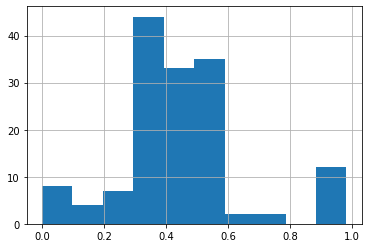

In [17]:
# Cell for your work here
cat_df.isnull().mean().hist()



In [27]:
# Provide the key as an `integer` that answers the question

cat_df_dict = {'the number of columns with no missing values': 6, 
               'the number of columns with more than half of the column missing': 49,
               'the number of columns with more than 75% of the column missing': 13
}

# Check your dictionary results
t.cat_df_dict_check(cat_df_dict)

Oops! One or more of those doesn't look quite right.  Each value should be an integer corresponding to the number of columns described.


#### Question 3

**3.** For each of the categorical variables, we now need to create dummy columns.  However, as we saw above, there are a lot of missing values in the current set of categorical columns.  So, you might be wondering, what happens when you dummy a column that has missing values.

The documentation for creating dummy variables in pandas is available [here](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.get_dummies.html), but we can also just put this to practice to see what happens.

First, run the cell below to create a dataset that you will use before moving to the full stackoverflow data.

After you have created **dummy_var_df**, use the additional cells to fill in the **sol_3_dict** with the correct variables that match each key.

In [28]:
dummy_var_df = pd.DataFrame({'col1': ['a', 'a', 'b', 'b', 'a', np.nan, 'b', np.nan],
                             'col2': [1, np.nan, 3, np.nan, 5, 6, 7, 8] 
})
                            
dummy_var_df

,col1,col2
0,a,1.0
1,a,NaN
2,b,3.0
3,b,NaN
4,a,5.0
5,NaN,6.0
6,b,7.0
7,NaN,8.0


In [29]:
pd.get_dummies(dummy_var_df['col1'])# Use this cell to write whatever code you need.

,a,b
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0
5,0,0
6,0,1
7,0,0


In [30]:
a = 1
b = 2
c = 3
d = 'col1'
e = 'col2'
f = 'the rows with NaNs are dropped by default'
g = 'the NaNs are always encoded as 0'


sol_3_dict = {'Which column should you create a dummy variable for?': d,
              'When you use the default settings for creating dummy variables, how many are created?': 2,
              'What happens with the nan values?': g 
             }

# Check your dictionary against the solution
t.sol_3_dict_check(sol_3_dict)

Nice job! That looks right to me!


#### Question 4

**4.** Notice, you can also use **get_dummies** to encode **NaN** values as their own dummy coded column using the **dummy_na** argument.  Often these NaN values are also informative, but you are not capturing them by leaving them as 0 in every column of your model.

Create a new encoding for **col1** of **dummy_var_df** that provides dummy columns not only for each level, but also for the missing values below. Store the 3 resulting dummy columns in **dummy_cols_df** and check your solution against ours.

In [31]:
dummy_cols_df = pd.get_dummies(dummy_var_df['col1'], dummy_na=True)
#Create the three dummy columns for dummy_var_df

# Look at your result
dummy_cols_df

,a,b,NaN
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0
5,0,0,1
6,0,1,0
7,0,0,1


In [32]:
# Check against the solution
t.dummy_cols_df_check(dummy_cols_df)

Nice job! That looks right!


#### Question 5

**5.** We could use either of the above to begin creating an X matrix that would (potentially) allow us to predict better than just the numeric columns we have been using thus far.

First, complete the **create_dummy_df**.  Follow the instructions in the document string to assist as necessary.

In [200]:
#Create a copy of the dataframe
cat_df_copy = cat_df.copy()

#Pull a list of the column names of the categorical variables
cat_cols_lst = cat_df.columns

In [201]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    df_cat = df[cat_cols]
    df_num = df.drop(columns=cat_cols, axis=1)
    df_cat_dummy = pd.get_dummies(df_cat, prefix=cat_cols, prefix_sep='_', dummy_na=dummy_na, columns=cat_cols, drop_first=True)
    df = pd.concat([df_num, df_cat_dummy], axis=1)

    return df

In [191]:
df.dropna(axis=0, how='any', subset=['Salary'], inplace=True)
df_new = create_dummy_df(df, cat_cols_lst, dummy_na=False) #Use your newly created function

# Show shape to assure it has a shape of (5009, 11938)
print(df_new.shape)

(5009, 11938)


In [155]:
df_new.head()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary,"ProgramHobby_Yes, I contribute to open source projects","ProgramHobby_Yes, I program as a hobby","ProgramHobby_Yes, both",...,QuestionsInteresting_Strongly agree,QuestionsInteresting_Strongly disagree,QuestionsConfusing_Disagree,QuestionsConfusing_Somewhat agree,QuestionsConfusing_Strongly agree,QuestionsConfusing_Strongly disagree,InterestedAnswers_Disagree,InterestedAnswers_Somewhat agree,InterestedAnswers_Strongly agree,InterestedAnswers_Strongly disagree
2,3,8.0,9.0,NaN,8.0,113750.0,NaN,0,0,1,...,0,0,1,0,0,0,0,0,0,0
14,15,8.0,8.0,NaN,8.0,100000.0,NaN,0,1,0,...,0,0,1,0,0,0,0,0,0,0
17,18,9.0,8.0,NaN,8.0,130000.0,NaN,0,0,1,...,0,0,1,0,0,0,0,0,0,0
18,19,5.0,3.0,NaN,NaN,82500.0,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,0
22,23,8.0,9.0,NaN,8.0,100764.0,NaN,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [156]:
df_new.mean()

Respondent                              9245.041525
CareerSatisfaction                         7.534907
JobSatisfaction                            7.024825
HoursPerWeek                               2.447415
StackOverflowSatisfaction                  8.442686
                                           ...     
QuestionsConfusing_Strongly disagree       0.256938
InterestedAnswers_Disagree                 0.014973
InterestedAnswers_Somewhat agree           0.082252
InterestedAnswers_Strongly agree           0.401877
InterestedAnswers_Strongly disagree        0.006588
Length: 11938, dtype: float64

#### Question 6

**6.** Use the document string below to complete the function.  Then test your function against the solution.  

In [202]:
def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na=False, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Your function should:
    1. Drop the rows with missing response values
    2. Drop columns with NaN for all the values
    3. Use create_dummy_df to dummy categorical columns
    4. Fill the mean of the column for any missing values 
    5. Split your data into an X matrix and a response vector y
    6. Create training and test sets of data
    7. Instantiate a LinearRegression model with normalized data
    8. Fit your model to the training data
    9. Predict the response for the training data and the test data
    10. Obtain an rsquared value for both the training and test data
    '''
    
    df.dropna(axis=0, how='any', subset=[response_col], inplace=True)
    df.dropna(axis=1, how='all', inplace=True)
    create_dummy_df(df, cat_cols, dummy_na=dummy_na)
    df.fillna(df.mean(), inplace=True, axis=0)
    
    y = df[response_col]
    X = df.drop(columns=[response_col], axis=1)
    
    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state) 

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit
        
    #Predict and score the model
    y_train_preds = lm_model.predict(X_train)
    y_test_preds = lm_model.predict(X_test)
    
    train_score = r2_score(y_train, y_train_preds)
    test_score = r2_score(y_test, y_test_preds)
    

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


In [203]:
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df, 'Salary', cat_cols_lst, dummy_na=False, test_size=.3, rand_state=42)

KeyError: "['ExCoderBalance', 'ExCoderWillNotCode', 'NonDeveloperType', 'ExCoderBelonged', 'ExCoderNotForMe', 'ExCoderActive'] not in index"

In [116]:
#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

NameError: name 'train_score' is not defined

Notice how much higher the rsquared value is on the training data than it is on the test data - why do you think that is?

In [117]:
def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Your function should:
    1. Drop the rows with missing response values
    2. Drop columns with NaN for all the values
    3. Use create_dummy_df to dummy categorical columns
    4. Fill the mean of the column for any missing values 
    5. Split your data into an X matrix and a response vector y
    6. Create training and test sets of data
    7. Instantiate a LinearRegression model with normalized data
    8. Fit your model to the training data
    9. Predict the response for the training data and the test data
    10. Obtain an rsquared value for both the training and test data
    '''
    #Dropping where the salary has missing values
    df = df.dropna(subset=[response_col], axis=0)
    df = df.dropna(axis=1, how='all')
        
    df = create_dummy_df(df, cat_cols, dummy_na = False)
    df = df.fillna(df.mean())
    
    #Split into explanatory and response variables
    X = df.drop(columns = response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=rand_state) 

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit
    
    #Predict and score
    y_train_preds = lm_model.predict(X_train) 
    y_test_preds = lm_model.predict(X_test) 
  
    # test_score - float - r2 score
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)
    
    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test
